In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
books = pd.read_csv("dataset/BX-Books.csv", sep=";", on_bad_lines='skip', encoding='latin-1')

/var/folders/2j/gn1vykwj7xdd3jg0fdtcnmsr0000gn/T/ipykernel_19722/4175132467.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("dataset/BX-Books.csv", sep=";", on_bad_lines='skip', encoding='latin-1')


In [69]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [70]:
books.shape

(271360, 8)

In [71]:
round(books.isna().sum() * 100 / len(books), 2)

ISBN                   0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Image-URL-S            0.0
Image-URL-M            0.0
Image-URL-L            0.0
dtype: float64

In [72]:
books.duplicated().sum()

0

In [73]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [74]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

In [75]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [76]:
books.rename(columns={
    'Book-Title' : 'title',
    'Book-Author' : 'author',
    'Year-of-Publication' : 'year',
    'Publisher' : 'publisher',
    'Image-URL-L' : 'image',
}, inplace=True)

In [77]:
books

,ISBN,title,author,Year-Of-Publication,publisher,image
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [78]:
users = pd.read_csv("dataset/BX-Users.csv", sep=";", on_bad_lines='skip', encoding='latin-1')

In [79]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [80]:
round(users.isna().sum() * 100 / len(users))

User-ID      0.0
Location     0.0
Age         40.0
dtype: float64

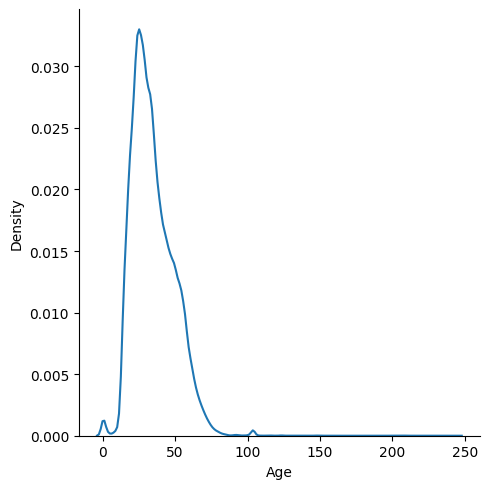

In [81]:
sns.displot(x='Age', data=users, kind='kde')

In [82]:
users['Age'].fillna(users['Age'].median(), inplace=True)

/var/folders/2j/gn1vykwj7xdd3jg0fdtcnmsr0000gn/T/ipykernel_19722/556211096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(users['Age'].median(), inplace=True)


In [83]:
round(users.isna().sum() * 100 / len(users))

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [84]:
users.duplicated().sum()

0

In [85]:
ratings = pd.read_csv("dataset/BX-Book-Ratings.csv", sep=";", on_bad_lines="skip", encoding="latin-1")

In [86]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [87]:
ratings.shape

(1149780, 3)

In [88]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [89]:
ratings.rename(columns={
    "User-ID" : "user_id",
    "Book-Rating" : "rating"
}, inplace=True)

In [90]:
ratings

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [91]:
round(ratings.isna().sum() * 100 / len(ratings))

user_id    0.0
ISBN       0.0
rating     0.0
dtype: float64

In [92]:
ratings.duplicated().sum()

0

In [93]:
x = ratings['user_id'].value_counts() > 200

In [94]:
x[x].shape

(899,)

In [95]:
y = x[x].index

In [96]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [97]:
ratings = ratings[ratings['user_id'].isin(y)]

In [98]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [99]:
ratings.shape

(526356, 3)

In [100]:
ratings_with_books = ratings.merge(books, on="ISBN")

In [101]:
ratings_with_books

,user_id,ISBN,rating,title,author,Year-Of-Publication,publisher,image
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...


In [102]:
ratings_with_books.shape

(487671, 8)

In [103]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [104]:
num_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [105]:
num_rating.rename(columns={'rating' : 'num_of_rating'}, inplace=True)

In [106]:
num_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [107]:
final_rating = ratings_with_books.merge(num_rating, on='title')

In [108]:
final_rating

,user_id,ISBN,rating,title,author,Year-Of-Publication,publisher,image,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13
...,...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,1
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,1
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,1
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,1


In [109]:
final_rating.shape

(487671, 9)

In [110]:
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [111]:
final_rating.sample(10)

,user_id,ISBN,rating,title,author,Year-Of-Publication,publisher,image,num_of_rating
477939,269566,0380710722,0,It's Always Something,Gilda Radner,1990,Avon,http://images.amazon.com/images/P/0380710722.0...,66
379410,219546,0590471015,0,Silent Witness,Carol Ellis,1994,Scholastic Paperbacks (Mm),http://images.amazon.com/images/P/0590471015.0...,66
447001,250962,0440180295,0,Slaughterhouse Five or the Children's Crusade:...,Kurt Vonnegut,1991,Laurel,http://images.amazon.com/images/P/0440180295.0...,50
451853,252820,0670855030,0,Insomnia,Stephen King,1994,Viking Books,http://images.amazon.com/images/P/0670855030.0...,105
242724,140000,0842329129,8,Left Behind: A Novel of the Earth's Last Days ...,Tim Lahaye,1996,Tyndale House Publishers,http://images.amazon.com/images/P/0842329129.0...,99
136491,78783,0312924801,0,September,Rosamunde Pilcher,1991,St. Martin's Press,http://images.amazon.com/images/P/0312924801.0...,50
271976,157273,0743418204,0,In Her Shoes : A Novel,Jennifer Weiner,2003,Washington Square Press,http://images.amazon.com/images/P/0743418204.0...,81
179718,102967,0345413903,0,The Murder Book,Jonathan Kellerman,2003,Ballantine Books,http://images.amazon.com/images/P/0345413903.0...,86
283967,166596,0446604232,0,Exclusive,Sandra Brown,1997,Warner Books,http://images.amazon.com/images/P/0446604232.0...,52
167962,98391,0385335555,10,Tell No One,HARLAN COBEN,2001,Delacorte Press,http://images.amazon.com/images/P/0385335555.0...,94


In [112]:
final_rating.shape

(61853, 9)

In [113]:
final_rating.drop_duplicates(['user_id', 'title'], inplace=True)

/var/folders/2j/gn1vykwj7xdd3jg0fdtcnmsr0000gn/T/ipykernel_19722/3662504876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating.drop_duplicates(['user_id', 'title'], inplace=True)


In [114]:
final_rating.shape

(59850, 9)

In [115]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [116]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [118]:
book_pivot.shape

(742, 888)

In [119]:
book_pivot.fillna(0, inplace=True)

In [121]:
from scipy.sparse import csr_matrix

book_sparse = csr_matrix(book_pivot)

In [122]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

In [123]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')

In [124]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [125]:
distance, suggestion = model.kneighbors(book_pivot.iloc[69,:].values.reshape(1,-1), n_neighbors=6)

In [126]:
distance

array([[ 0.        , 32.60368077, 33.42154993, 33.60059523, 33.88214869,
        34.0881211 ]])

In [127]:
suggestion

array([[ 69, 372, 320, 184, 149, 308]])

In [128]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Beach Music', 'No Safe Place', 'Long After Midnight', 'Exclusive',
       'Debt of Honor (Jack Ryan Novels)', 'Lake Wobegon days'],
      dtype='object', name='title')


In [129]:
book_pivot.index[3]

'4 Blondes'

In [130]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [131]:
books_name = book_pivot.index

In [132]:
import pickle
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

In [133]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [134]:
book_name = 'A Civil Action'
recommend_book(book_name)

A Civil Action
No Safe Place
Exclusive
Jacob Have I Loved
Long After Midnight
The Cradle Will Fall
